In [7]:
import sys
import os
sys.path.append(os.path.abspath("../"))

import pandas as pd
import utils
# Mining: multidupehack
# Plotting
import plot_automations as plotter

Loïc Cerf and Wagner Meira Jr. Complete Discovery of High-Quality Patterns in Large Numerical Tensors. In ICDE'14: Proceedings of the 30th International Conference on Data Engineering, pages 448–459. IEEE Computer Society, April 2014.

**1. Multidupehack input file**

In [8]:
df = pd.read_csv("../01_artwork_clustering/omniart-post-artwork-clustering.csv")

In [9]:
artwork_clusters = pd.read_csv("../01_artwork_clustering/artwork-centroids.csv")

In [10]:
utils.prepare_multidupehack_input(df, "school", "school_mining.txt")

**2. Itemset mining**

In [5]:
patterns_df = utils.parse_patterns("school_patterns.txt", "schools")

In [6]:
patterns_df

,schools,clusters,n_schools,n_clusters,support
0,"[-Venezuela, -Denmark, -Switzerland, -China, -...","[47, 93, 82, 77, 75, 81, 24, 71]",17,8,136
1,"[-Venezuela, -Denmark, -modern, -China, -Unite...","[47, 93, 82, 77, 75, 59, 81, 24, 71]",16,9,144
2,"[-Venezuela, -Switzerland, -Hungary, -China, -...","[47, 92, 93, 82, 77, 75, 81, 83, 24, 71]",15,10,150
3,"[-Venezuela, -Switzerland, -modern, -China, -A...","[47, 92, 53, 93, 82, 77, 75, 81, 83, 24, 71]",14,11,154
4,"[-Venezuela, -Hungary, -China, -Austria, -Japa...","[47, 92, 93, 82, 77, 75, 59, 81, 83, 24, 71]",14,11,154
...,...,...,...,...,...
4019,"[-Netherlands, -modern, -Italy, -Unknown]","[44, 46, 20, 68, 5, 79, 54, 90, 73, 87, 98, 41...",4,88,352
4020,"[-France, -Italy, -Unknown, -modern]","[2, 31, 63, 46, 45, 22, 6, 20, 68, 5, 79, 54, ...",4,92,368
4021,"[-France, -modern, -Unknown]","[2, 31, 63, 46, 45, 22, 40, 6, 20, 68, 5, 79, ...",3,93,279
4022,"[-Italy, -Unknown, -modern]","[58, 2, 76, 44, 31, 63, 46, 45, 22, 6, 51, 20,...",3,97,291


Plot saved to images/weighted_school_patterns_per_support_count.png


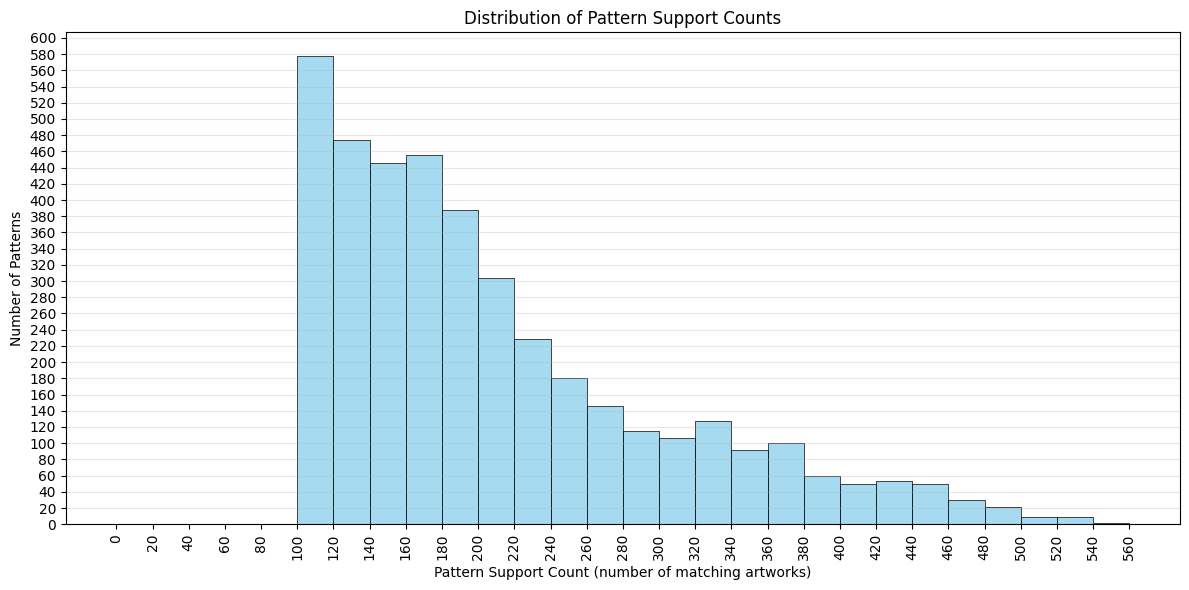

In [7]:
plotter.plot_support_analysis(patterns_df, "images/weighted_school_patterns_per_support_count.png")

Plot saved to images/weighted_school_n_school_per_pattern.png


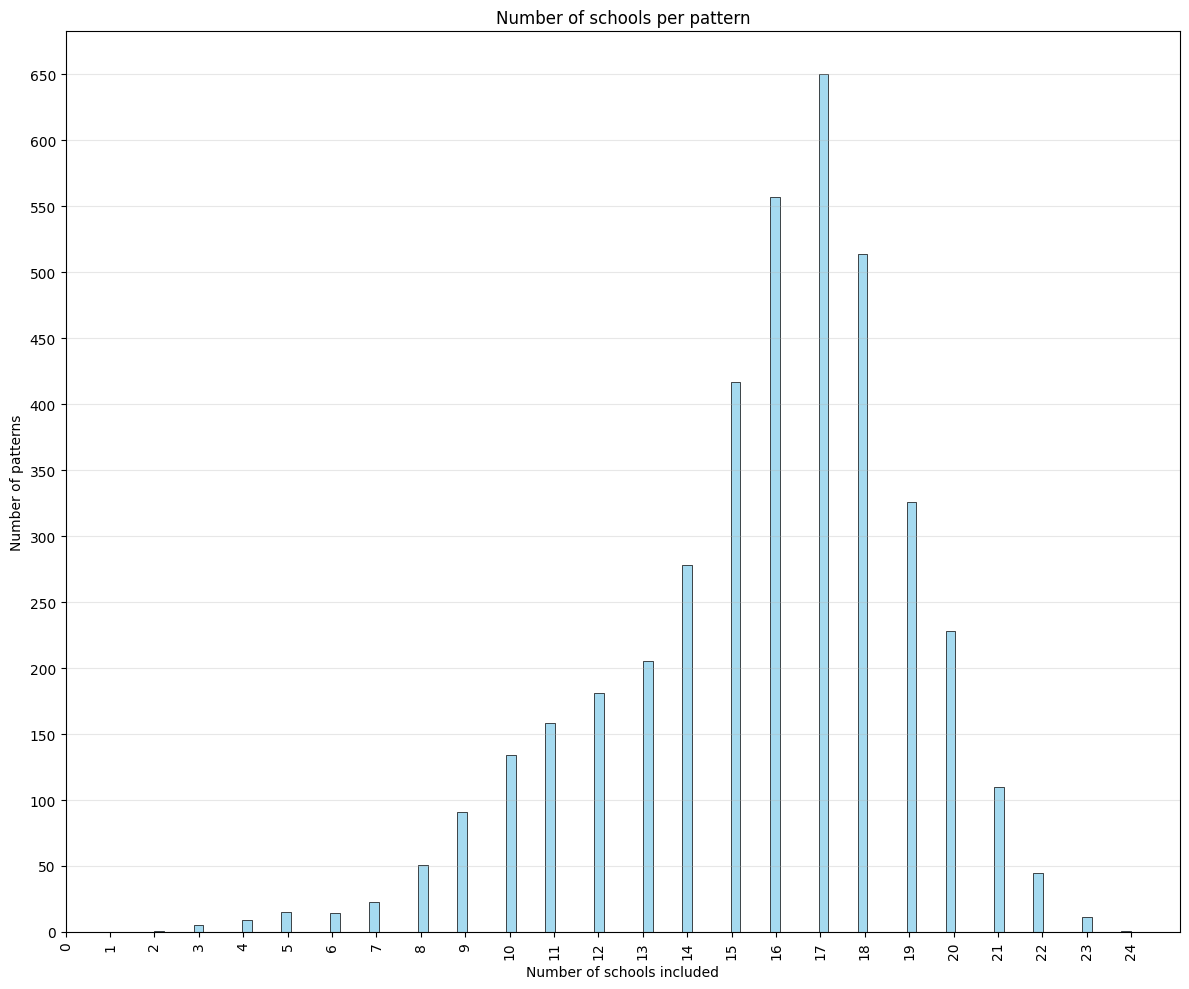

In [8]:
plotter.plot_pattern_size_distribution(patterns_df, "schools", "images/weighted_school_n_school_per_pattern.png")

In [9]:
plotter.plot_pattern_size_distribution(patterns_df, "colors", "images/weighted_school_n_colors_per_pattern.png")

KeyError: 'n_colors'

<Figure size 1200x1000 with 0 Axes>

In [ ]:
plotter.plot_color_cooccurrence_matrix(patterns_df, save_path="images/weighted_color_cooccurrence_matrix.png")

In [ ]:
patterns_df['schools_range'] = patterns_df['schools'].apply(
    lambda x: f"{min(x, key=lambda s: len(s))}-{max(x, key=lambda s: len(s))}" 
    if len(x) > 1 
    else x[0]
)

In [ ]:
aggregated_patterns_df = patterns_df.groupby('schools_range').apply(lambda x: pd.Series({
    'schools': list(set([item for sublist in x['schools'] for item in sublist])),
    'colors': list(set([item for sublist in x['colors'] for item in sublist])),
    'colors_names': list(set([item for sublist in x['colors_names'] for item in sublist])),
    'n_schools': len(list(set([item for sublist in x['schools'] for item in sublist]))),
    'n_colors': len(list(set([item for sublist in x['colors'] for item in sublist]))),
    'support': x['support'].max()
})).reset_index()

In [ ]:
aggregated_patterns_df.to_csv("weighted_school_mining.csv", index=False)

In [ ]:
unique_school_ranges = patterns_df['schools_range'].unique()

In [ ]:
unique_school_ranges

In [ ]:
for school_range in unique_school_ranges:
    plotter.plot_color_grid(patterns_df, "schools", school_range, save_path=f"images/color_palettes/weighted_{school_range}.png")